In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection And Pre-processing

In [2]:
# Data collection from csv file.
data=pd.read_csv(r"C:\Users\91749\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\91749\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [4]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# Checking the shape of train Dataset.
data.shape

(159571, 8)

The train dataset contains 159571 rows and 8 columns.

In [7]:
# Checking the shape of test dataset.
test.shape

(153164, 2)

The test dataset contains 153164 rows and 2 columns. 

In [8]:
# Checking the null values in dataset.
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

The dataset doesn't contain any null values. 

In [9]:
# Checking the null values in test data.
test.isnull().sum()

id              0
comment_text    0
dtype: int64

There are no null values in test data.

In [10]:
# Checking the total summary of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
# Checking the dataset data type.
data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

'id'and 'comment_text' have object datatype and other all are integer datatype.

In [12]:
# Checking the train dataset columns.
data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [13]:
# Checking the test dataset columns.
test.columns

Index(['id', 'comment_text'], dtype='object')

In [14]:
# Checking the value counts of train dataset.
data.value_counts()

id                comment_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [15]:
# Checking the value counts of 'malignant' column.
data['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [16]:
# Checking the value counts of 'highly_malignant' column.
data['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [17]:
# Checking the value counts of 'rude' column.
data['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [18]:
#  Checking the value counts of 'threat' column.
data['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [19]:
# # Checking the value counts of 'abuse' column.
data['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [20]:
# Checking the value counts of 'loathe' column.
data['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

We will remove the irrelevent columns from the dataset and that is 'id' column, we don't need it for model prediction. So, we will drop this column. 

In [21]:
data.drop('id',axis=1,inplace=True)

In [22]:
# Checking the columns after dropping the 'id' column.
data.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

We have successfully dropped the 'id' column from dataset.

# Exploratory Data Analysis

In [23]:
# lets check few comments present in the train dataset
data['comment_text'][9]

'alignment on this subject and which are contrary to those of DuLithgow'

In [24]:
data['comment_text'][27]

"Yes, because the mother of the child in the case against Michael Jackson was studied in here motives and reasonings and judged upon her character just as harshly as Wacko Jacko himself.  Don't tell me to ignore it and incriminate myself.  I am going to continue refuting the bullshit that Jayjg keeps throwing at me.   18:01, 16 Jun 2005 (UTC)"

In [25]:
data['comment_text'][5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [26]:
data['comment_text'][117]

'Also see this if you cant trust Murkoth Ramunni\nhttp://books.google.com/books?id=HHev0U1GfpEC&pg;=PA51&dq;=Thiyya+matrilineal&hl;=en&sa;=X&ei;=TlpPUd2aH8mWiQLgvIDgBA&ved;=0CDYQ6AEwAQ#v=onepage&q;=Thiyya%20matrilineal&f;=false'

In [27]:
# lets create a new column showing length of words in comment_text in train dataset.

data['before_clean']=data['comment_text'].map(lambda comment_text: len(comment_text))
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [28]:
# Lets create a new column named before clean showing no. of words present in comment_text column in test dataset

test['before_clean']=test['comment_text'].map(lambda comment_text: len(comment_text))
test

,id,comment_text,before_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


In [29]:
# lets download latest updated stopwords and wordnet.
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import re
import string

In [32]:
stop_words=stopwords.words('english')
lemmatizer=wordnet.WordNetLemmatizer()
# lets clean the messages and remove or replace some words
def edited(text):
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # lets remove '\n' in comment_text
    text= re.sub(r'\n',' ',text)
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [33]:
!pip install nltk

In [34]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
data['comment_text'] = data['comment_text'].apply(edited)
data['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [36]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
data['len_after_cleaning'] = data['comment_text'].map(lambda comment_text: len(comment_text))
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,56


In [37]:
# lets import wordcloud to jupyter notebook
!pip install wordcloud

In [38]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
def wcloud(data, label):
    
    # lets print only rows where the label value is 1 (ie. where comment is harsh)
    subset=data[data[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

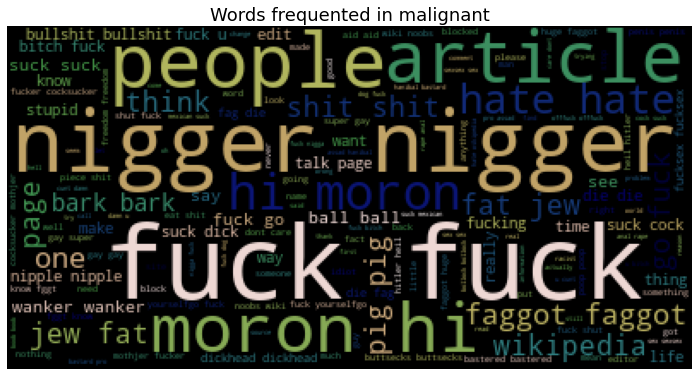

In [40]:
data_m=data.loc[:,['comment_text','malignant']]
wcloud(data_m,'malignant')

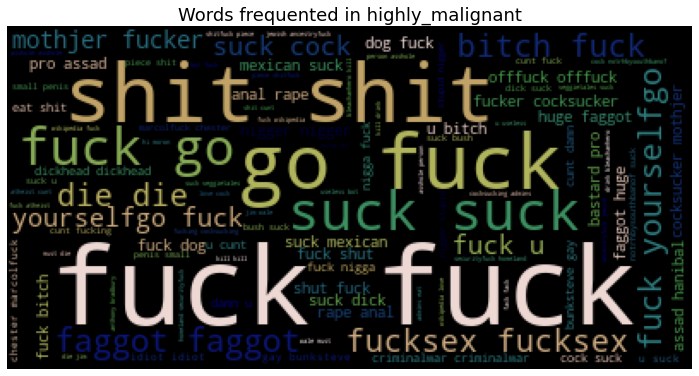

In [41]:
data_hm=data.loc[:,['comment_text','highly_malignant']]
wcloud(data_hm,'highly_malignant')

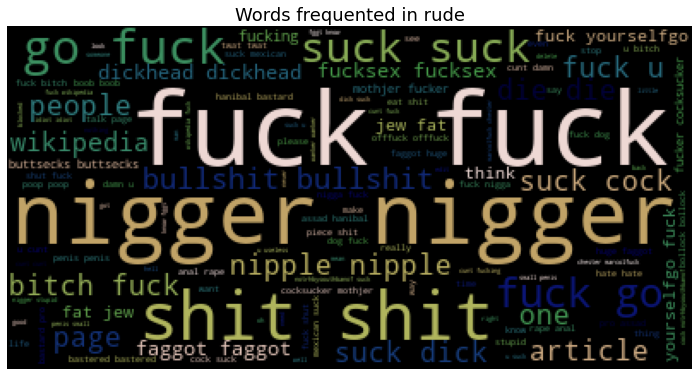

In [42]:
data_r=data.loc[:,['comment_text','rude']]
wcloud(data_r,'rude')

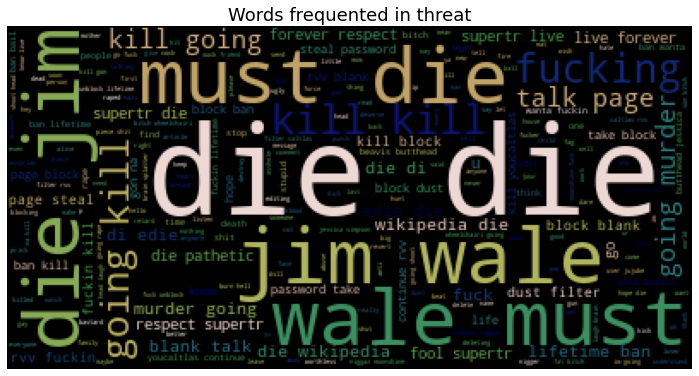

In [43]:
data_t=data.loc[:,['comment_text','threat']]
wcloud(data_t,'threat')

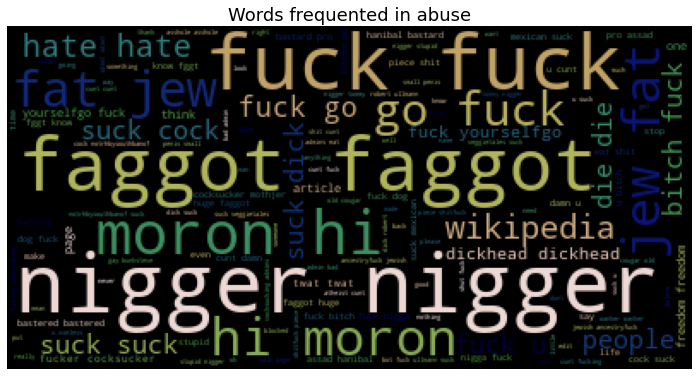

In [44]:
data_a=data.loc[:,['comment_text','abuse']]
wcloud(data_a,'abuse')

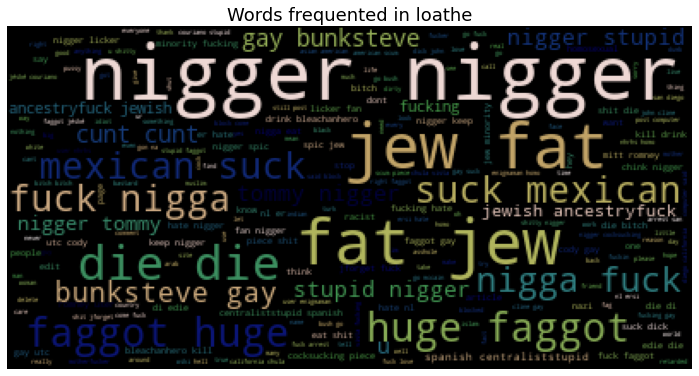

In [45]:
data_l=data.loc[:,['comment_text','loathe']]
wcloud(data_l,'loathe')

In [46]:
# Checking the statistical summary of the dataset.
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,241.114238
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,377.602191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,56.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,123.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,263.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


Here we can see that only 2 values are present in all the columns i.e. 0 and 1.

Low score of standard devaiation tells us that the data is not spreaded.

there is difference in mean and median which tells us that some skewness is present.

very low difference in 75% and max shows that there are no outliers present in the dataset.

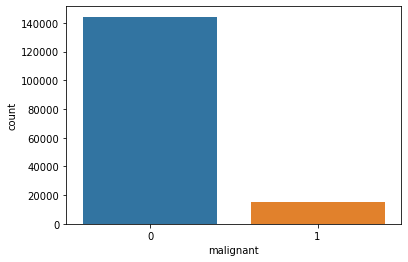

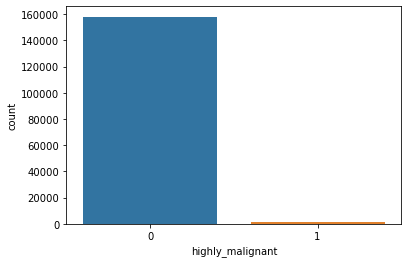

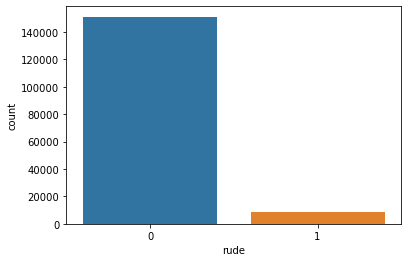

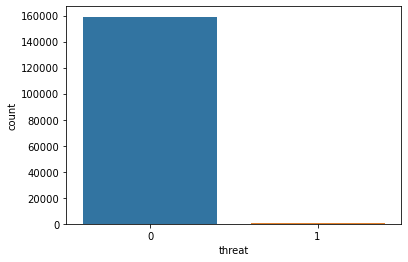

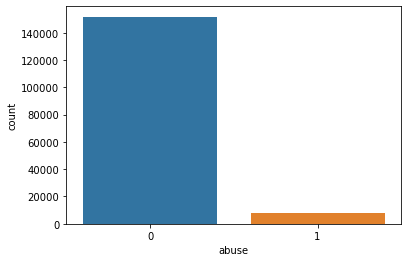

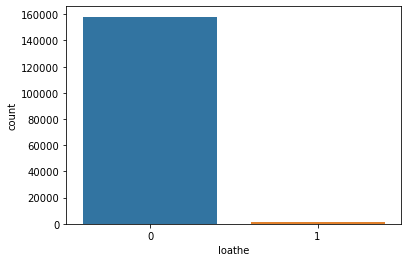

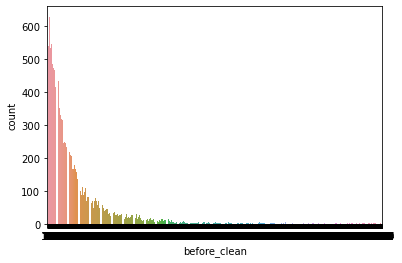

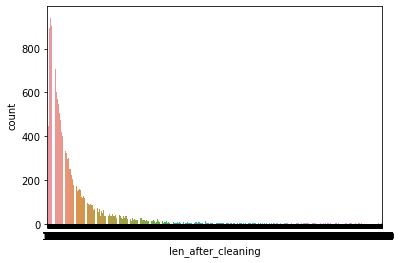

In [47]:
# lets plot all features using countplot.

feat=data.columns[1:]
for col in feat:
    sns.countplot(data[col])
    plt.show()

In [48]:
# lets create a list of feature columns

featu=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [49]:
# lets store the no. of counts for every target

counts=data[featu].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

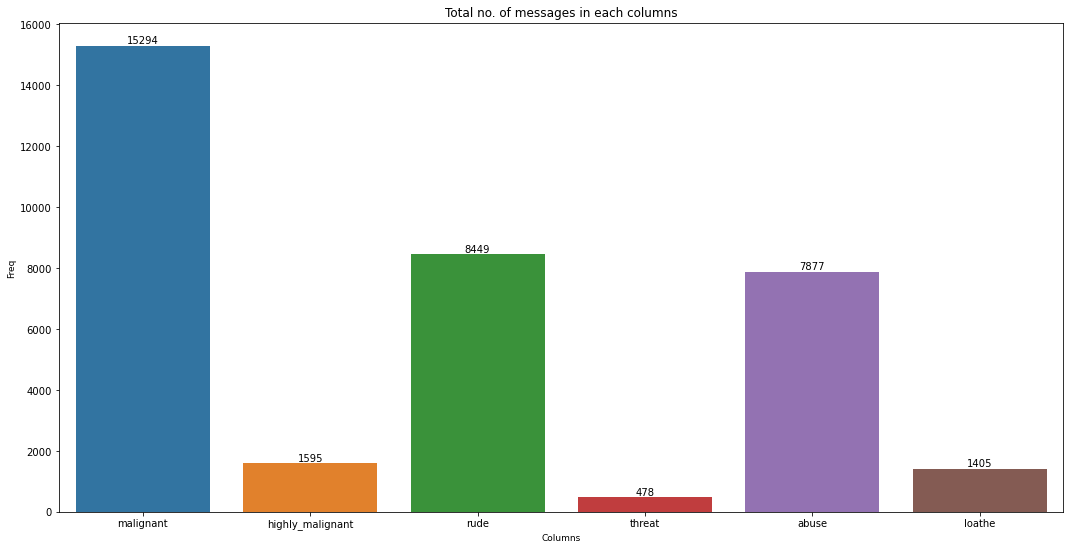

In [50]:
# lets plot and visualize count of each columns

plt.figure(figsize=(18,9))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

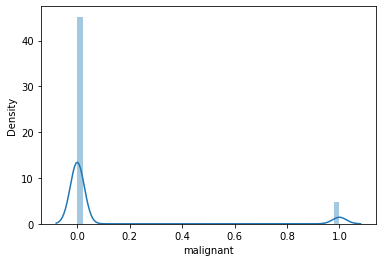

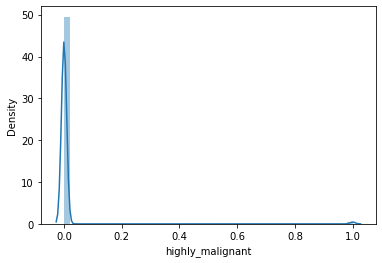

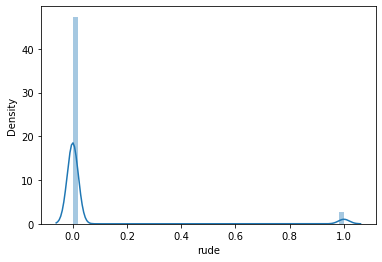

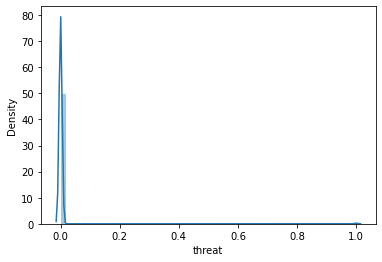

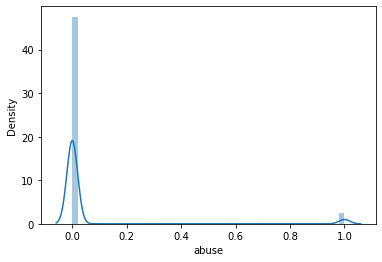

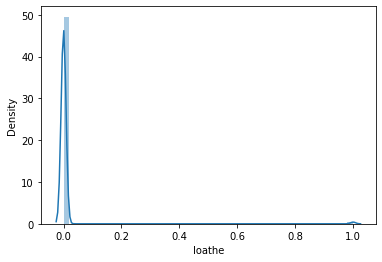

In [51]:
# lets check the distribution of data using distplot
for col in data[featu].describe().columns:
    sns.distplot(data[featu][col])
    plt.show()

Here all the features are mostly right skewed.

# Checking the correlation 

In [52]:
data.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.050770
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.015696
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.038521
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.010726
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.040995
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.008135
before_clean,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,0.987593
len_after_cleaning,-0.050770,0.015696,-0.038521,-0.010726,-0.040995,-0.008135,0.987593,1.000000


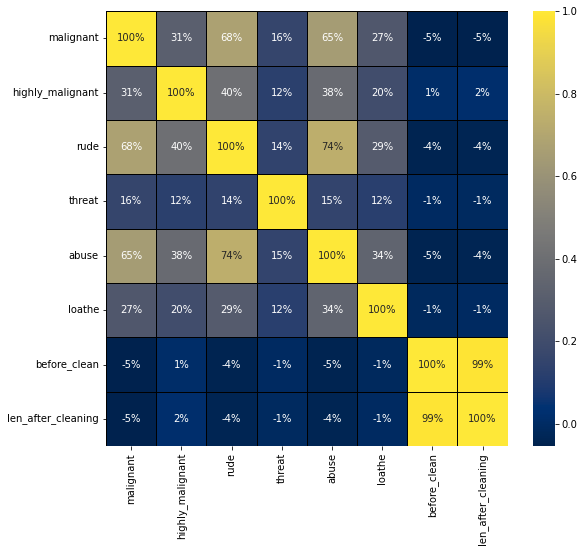

In [53]:
# Visualizing the correlation using heatmap.
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),linewidth=0.5, linecolor='black',fmt='.0%',annot=True,cmap='cividis')
plt.show()

Here we can see that only 2 values are present in all the columns i.e. 0 and 1.
Low score of standard devaiation tells us that the data is not spreaded.
there is difference in mean and median which tells us that some skewness is present.
very low difference in 75% and max shows that there are no outliers present in the dataset.

In [54]:
# lets create label column in train dataset
c_label= ['malignant','highly_malignant','rude','threat','abuse','loathe']
data[c_label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [55]:
data['label']=data[c_label].sum(axis=1)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364,0
4,sir hero chance remember page,0,0,0,0,0,0,67,29,0


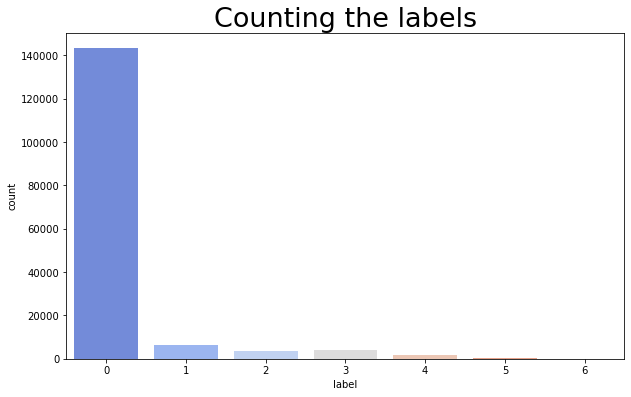

In [56]:
#lets Check the count of labels
plt.figure(figsize=(10,6))
sns.countplot(data['label'], palette='coolwarm')
plt.title('Counting the labels',fontsize=27)
plt.show()

# Model Building 

In [57]:
# lets convert text data using TfidfVectorizer
# lets import library for vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [58]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
x = tfidf.fit_transform(data['comment_text'])

In [59]:
# lets first convert features into number vectors
y=data['label']

In [60]:
# lets check the shape of the dataset
print(x.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [62]:
# Doing the above process for test data 
test_vec = tfidf.fit_transform(test['comment_text'])
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [63]:
test_vec.shape

(153164, 14000)

In [64]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [65]:
# Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 14000) 		 (47872, 14000)


In [66]:
# Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


In [67]:
# Importing required libraries

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [68]:
# Initializing the instance of the model
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [69]:
# Defining a sing function for all models.
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('***********************************************\n')    

In [70]:
# Models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC
Accuracy score: 0.9176554144385026
f1_score: 0.9176554144385026
Precision :  0.9176554144385026
Recall: 0.9176554144385026
Confusion matrix:
  [[[ 2850  2018]
  [  257 42747]]

 [[45344   620]
  [ 1573   335]]

 [[46511   317]
  [  907   137]]

 [[45861   748]
  [  657   606]]

 [[47134   210]
  [  431    97]]

 [[47729    27]
  [  108     8]]

 [[47861     2]
  [    9     0]]]
***********************************************

classifier: LogisticRegression
Accuracy score: 0.9156291778074866
f1_score: 0.9156291778074866
Precision :  0.9156291778074866
Recall: 0.9156291778074866
Confusion matrix:
  [[[ 2130  2738]
  [   97 42907]]

 [[45521   443]
  [ 1685   223]]

 [[46676   152]
  [  991    53]]

 [[45991   618]
  [  661   602]]

 [[47261    83]
  [  481    47]]

 [[47751     5]
  [  115     1]]

 [[47863     0]
  [    9     0]]]
***********************************************

classifier: MultinomialNB
Accuracy score: 0.9093415775401069
f1_score: 0.90934157754010

# Hyper Parameter Tunning

In [71]:
# Creating parameter list to pass in GridSearchCV
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [72]:
from sklearn.model_selection import GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv = 3, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=-1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [74]:
GCV.best_params_

{'estimator__C': 2,
 'estimator__dual': False,
 'estimator__intercept_scaling': 5,
 'estimator__loss': 'squared_hinge',
 'estimator__multi_class': 'crammer_singer',
 'estimator__penalty': 'l1'}

In [76]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='squared_hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=5))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Accuracy score: 0.9177389705882353
f1_score: 0.9177389705882353
Precision :  0.9177389705882353
Recall: 0.9177389705882353

Confusion matrix: 
 [[[ 2889  1979]
  [  279 42725]]

 [[45465   499]
  [ 1633   275]]

 [[46575   253]
  [  904   140]]

 [[45764   845]
  [  598   665]]

 [[47065   279]
  [  411   117]]

 [[47684    72]
  [  104    12]]

 [[47852    11]
  [    9     0]]]


In [78]:
lsvc_prediction=model.predict(x)

# Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':lsvc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


# Saving the model

In [79]:
import pickle
filename='MalignantCommentsClassifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [80]:
# Checking our vectorized test data
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [81]:
# Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier.pkl','rb'))
fitted_model

OneVsRestClassifier(estimator=LinearSVC(C=2, dual=False, intercept_scaling=5,
                                        multi_class='crammer_singer',
                                        penalty='l1'))

In [83]:
# Test predictions
test_results=pd.DataFrame(test)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [84]:
# Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

In [86]:
# Reading test dataset.
test=pd.read_csv(r"C:\Users\91749\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [87]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [88]:
# Predictions on test data.
test_prediction=model.predict(test_vec)
test=pd.DataFrame({'Predictions':test_prediction})
test

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [89]:
# lets save the predictions
test_results=pd.DataFrame(test)
test_results.to_csv('Malignant_TestDataPredictions.csv')

# Saving the prediction of the model

In [90]:
malignant_prediction.to_csv('Malignant_DataPredictions.csv')